<a id='top'></a>

# Homework 5: Bootstrap, Hypothesis Testing and Regression
***

**Name**: James Gallmeister

***

This assignment is due on Moodle by **5 PM on Friday April 19**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) 

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [15 points] Problem 1 - Hypothesis Testing Whether your Co-worker is a Doofus 

You are working as a Data Scientist for an internet-based hedgehog deliver company. Your co-worker, Daley Jennanigans, is a lovable scamp! Unfortunately, Daley also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's hedgehog-loving customers. In each case, clearly explain why Daley's hypothesis testing setup or conclusion is incorrect.

**Part A**: Daley has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought a hedgehog. Let $X$ be the random variable describing the number of website visitors who bought a hedgehog in the previous month, and suppose that the population proportion of visitors who bought a hedgehog is $p$. Daley is interested to see if the data suggests that more than 20% of website visitors actually buy a hedgehog.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$. 

**Answer A**
<br>I believe in this case, the null hypothesis, $H_0: \hat{p} = 0.20$ should not use a $\hat{p}$ and should instead use $p$. Usually $\hat{p}$ is used as an estimator for $p$ but in this case, we don't need to use an estimator because our null hypothesis is our baseline and not something we need to estimate using our population.

**Part B**: Daley decides instead to do his hypothesis test with a null hypothesis of $H_0: p < 0.20$.  

**Answer B**
<br>From in-class lectures and examples of hypothesis testing, the null hypothesis should always involve an equivalence relation where the alternative hypothesis should contain some other quantifier. Having $H_0 : p < 0.20$ as the null hypothesis doesn't make sense.

**Part C**: Now Daley is finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$. Daley computes for the sample proportion a normalized test-statistic of $z = 2.4$ and states that since $z = 2.4 > 0.01$ there is insufficient statistical evidence at the $\alpha = 0.01$ significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

**Answer C**
<br>In this hypothesis test, Daley is using the test statistic as a measure to compare against the significance level which isn't correct. The correct action would be to use the test statistic to find a p-value and compare that p-value to the significance level.

**Part D**: Daley is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$, and found the test-statistic $z=2.4$. Daley computes his p-value as:
$$\text{p-value} = \texttt{stats.norm.cdf(2.4)} = 0.9918$$

Since his p-value (0.9918) is greater than the significance level (0.01), Daley again claims that there is insufficient evidence at the 1% significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

**Answer D**
<br>In this hypothesis test, I believe our p-value should be computed as $1 - \Phi(2.4)$, not just as $\Phi(2.4)$.

**Part E**: Daley is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. Suppose he computes a p-value of $0.03$, and then concludes that there is only a 3% probability that the null hypothesis is true. 

**Answer**
<br>This is a misinterpretation of the results of the hypothesis test. The test does not give us a numerical value associated with the validity of the null hypothesis. It instead gives us a value which we can check against various other values such as significance levels to determine whether or not we have sufficient evidence to reject the null hypothesis or if we do not have enough evidence to reject the null hypothesis. We don't get a probability out of hypothesis testing.

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [25 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be approximately normally distributed. The mean reaction times (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Set up your calculations by hand, and report the results in Markdown/MathJax. Of course, you can and should use Python as a calculator.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [99]:
n = 10
df = n-1
coffee_nap = {'mean': 451.3, 'sd': 31.9}
coffee = {'mean': 494.2, 'sd': 39.6}
nap = {'mean': 492.8, 'sd': 45.2}

t_crit = stats.t.ppf(0.975, df)

ci = (coffee_nap['mean'] - t_crit * (coffee_nap['sd'])/np.sqrt(n), coffee_nap['mean'] + t_crit * (coffee_nap['sd'])/np.sqrt(n))
print('The 95% CI for coffee+nap is: [{0:.4f}, {1:.4f}]'.format(ci[0], ci[1]))

ci = (coffee['mean'] - t_crit * (coffee['sd'])/np.sqrt(n), coffee['mean'] + t_crit * (coffee['sd'])/np.sqrt(n))
print('The 95% CI for coffee+nap is: [{0:.4f}, {1:.4f}]'.format(ci[0], ci[1]))

ci = (nap['mean'] - t_crit * (nap['sd'])/np.sqrt(n), nap['mean'] + t_crit * (nap['sd'])/np.sqrt(n))
print('The 95% CI for coffee+nap is: [{0:.4f}, {1:.4f}]'.format(ci[0], ci[1]))

The 95% CI for coffee+nap is: [428.4801, 474.1199]
The 95% CI for coffee+nap is: [465.8719, 522.5281]
The 95% CI for coffee+nap is: [460.4659, 525.1341]


**Answer A**
<br>The above question follows the following procedure for computing a t-test CI
$$
\text{The formula for the t-test CI is quite similar to previous CI's computed: } \\
\bar{X} \pm t_{\frac{\alpha}{2}, n-1} \cdot \frac{s}{\sqrt{n}} \\
\bar{X} = \text{The mean for the data} \\
\alpha = 1 - \text{The percentile we are finding} \\
t = \text{The critical t-value that marks the upper tail} \\
n = \text{The sample size}
$$
<br>Using the above procedure we get the following confidence intervals
<br>  
$$
\text{CI for coffee and naps: } [428.4801, 474.1199] \\
\text{CI for just coffee: } [465.8719, 522.5281] \\
\text{CI for just naps: } [460.4659, 525.1341]
$$
<br>**(1)** From the above confidence intervals, we can see that with coffee and a nap, your reaction time will be faster than with just a coffee or just a nap.
<br>**(2)** We used a t-distribution because of our small sample size. We do not have enough values for the CLT to kick in so we use the t-distribution which can work with small sample sizes.

**Part B**: Use a **rejection region hypothesis test** to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Note** that the number of degrees of freedom for a two-sample t-test is $df_1 + df_2 = (n_1-1) + (n_2-1) = n_1 + n_2 - 2$ (where $n_1$ and $n_2$ are the number of data points from each of the two samples). All other mechanics are the same as the two-sample z-tests we know and love.

**Answer B**
<br>To complete this hypothesis test we will use a two sample t-test for the difference in means of the coffee and nap groups

$$
H_0 : \overline{X}_{\text{coffee}} - \overline{X}_{\text{nap}} = 0 \\
H_1 : \overline{X}_{\text{coffee}} - \overline{X}_{\text{nap}} > 0 \\
$$

In [106]:
num = 494.2 - 492.8
denom = np.sqrt(((39.6**2)/10) + ((45.2**2)/10))
ts = num / denom
t_crit = stats.t.ppf(0.975, df=18)
print('Test statistic: {0:.3f}'.format(ts))
print('Critical Value: {0:.3f}'.format(t_crit))

Test statistic: 0.074
Critical Value: 2.101


**Analysis**
<br>Because our test statistic, $0.074$ is much smaller than our critical value $2.101$ we conclude that there is not enough evidence at the 0.05 significance level to reject the null hypothesis.

**Part C**: Perform an appropriate hypothesis test (you may use either p-values or rejection region) to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap. So, there should be two separate hypothesis tests, but they are seeking to show similar results (one for coffee-nap versus coffee-only, and one for coffee-nap versus nap-only). Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Answer C**
<br>The first hypothesis test we will do will be comparing coffee-nap vs. coffee. This test will have the following hypothesis'.

$$
H_0 : \overline{X}_{\text{coffee}} - \overline{X}_{\text{coffee+nap}} = 0 \\
H_1 : \overline{X}_{\text{coffee}} - \overline{X}_{\text{coffee+nap}} > 0
$$

<br>The second hypothesis test will compare coffee-nap vs. nap. This test will have the following hypothesis':

$$
H_0 : \overline{X}_{\text{nap}} - \overline{X}_{\text{coffee+nap}} = 0 \\
H_1 : \overline{X}_{\text{nap}} - \overline{X}_{\text{coffee+nap}} > 0
$$

In [119]:
#Hypothesis test 1
num = 494.2 - 451.3
denom = np.sqrt((31.9**2 / 10) + (39.6**2 / 10))
ts = num / denom
p_val = 1 - stats.t.cdf(ts, df=18)
print("The p-value for hypothesis test between coffee+nap and coffee is {0:.3f}".format(p_val))

#Hypothesis test 2
num = 492.8 - 451.3
denom = np.sqrt((31.9**2 / 10) + (45.2**2 / 10))
ts = num / denom
p_val = 1 - stats.t.cdf(ts, df=18)
print("The p-value for hypothesis test between coffee+nap and nap is {0:.3f}".format(p_val))

The p-value for hypothesis test between coffee+nap and coffee is 0.008
The p-value for hypothesis test between coffee+nap and nap is 0.015


**Answer C**
<br>Both of these tests produce p-values that are smaller than the significance level $\alpha = 0.05$ we can conclude that there is enough evidence to reject the null hypothesis in both tests.

**Part D:** Is there sufficient evidence at the 95% confidence (5% significance) level to support claim that the reaction time after a coffee-nap is at least 20 ms faster than the reaction time after a coffee only? Fully justify your answer and show all work demonstrating this conclusion using a **p-value hypothesis test**. 

**Answer D**
<br>To complete this p-value hypothesis test we get the following hypothesis'
$$
H_0 : \overline{X}_{\text{coffee}} - \overline{X}_{\text{coffee-nap}} = 20 \\
H_1 : \overline{X}_{\text{coffee}} - \overline{X}_{\text{coffee-nap}} > 20
$$

In [120]:
num = 494.2 - 451.3 - 20
denom = np.sqrt((31.9**2 / 10) + (39.6**2 / 10))

ts = num/denom
p_val = 1 - stats.t.cdf(ts, df=18)
print("P-value: {0:.3f}".format(p_val))

P-value: 0.086


**Analysis**
<br>Because our above p-value is larger than our significance level, $\alpha = 0.05$, we can conclude that there is not enough evidence at the 5% significance level to reject the null hypothesis in this test.

**Part E**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

**Answer E**
<br>For this confidence interval we will use a Chi-Squared distribution

In [4]:
alpha = 0.05
sd = 31.9

den2 = stats.chi2.ppf(0.025, 9)
den1 = stats.chi2.ppf(0.975, 9)

ci = (np.sqrt((9*(sd**2)) / den1), np.sqrt((9*(sd**2)) / den2))
print("The 95% confidence interval for std of reaction time for coffee-nap is: [{0:.3f}, {1:.3f}]".format(ci[0], ci[1]))

The 95% confidence interval for std of reaction time for coffee-nap is: [21.942, 58.237]


<br>

---
[Back to top](#top)
<a id='p3'></a>

### [40 points] Problem 3 - Simple Linear Regression for Science!

From [Google Trends](https://trends.google.com/trends/?geo=US) data, it appears that interest in "science" in the United States has been waning since about 2004. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `science_interest.csv` into a Pandas DataFrame. Create two new columns:
* `year` should be the year associated with that data point, and
* `month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "science" has evolved over time. Label only the data point associated with January of each even year, and label with the year (and of course be sure to label your axes).

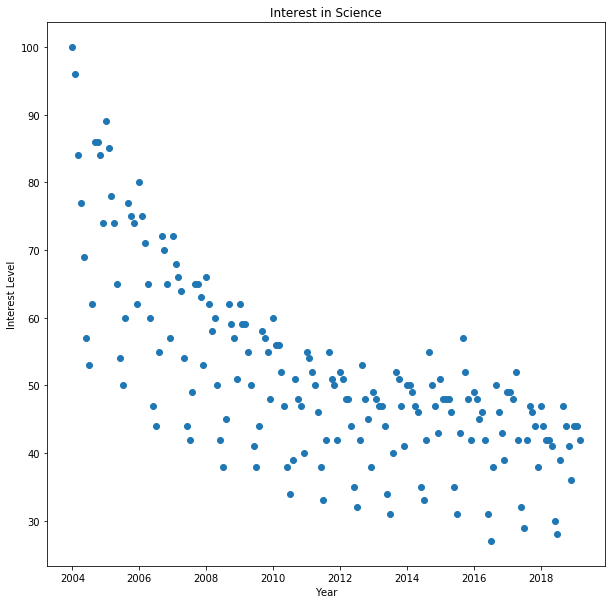

In [12]:
df = pd.read_csv('science_interest.csv', header=1, names = ['m-y', 'science'])
df['year'], df['month'] = df['m-y'].str.split('-', 1).str

ticks = [str(_) + '-01' for _ in range(2004,2020,2)]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot_date(df['m-y'], df['science'], xdate=True);
ax.set_title('Interest in Science');
ax.set_xlabel('Year');
ax.set_ylabel('Interest Level');
ax.set_xticks(ticks);
ax.set_xticklabels(range(2004, 2020,2));

**Part B:** These data (and the sea-level data from Homework 4) are a **time series**, where the independent variable is *time* and the dependent quantity is interest in science. One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in science, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of even years, and be sure to label your axes.

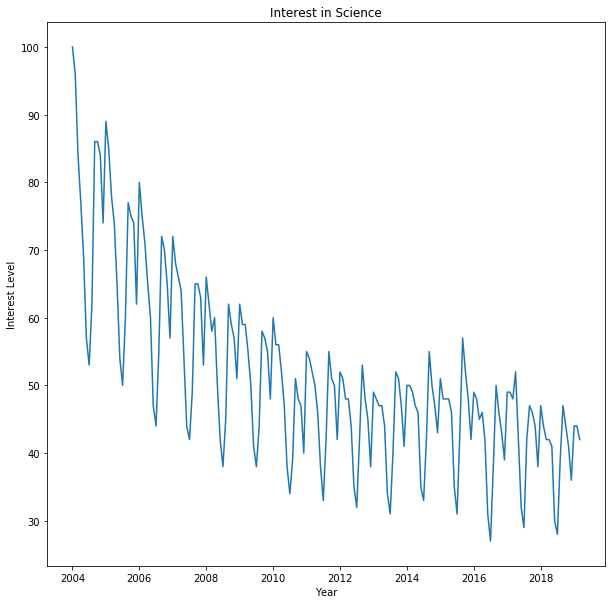

In [3]:
ticks = [str(_) + '-01' for _ in range(2004,2020,2)]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df['m-y'], df['science']);
ax.set_title('Interest in Science');
ax.set_xlabel('Year');
ax.set_ylabel('Interest Level');
ax.set_xticks(ticks);
ax.set_xticklabels(range(2004, 2020,2));

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in science? During which months is interest in science highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in science for each month. So, compute 12 values and report them in a table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists, dammit.

What do you think accounts for the drop(s) in interest in science during those month(s)? Recall that these data are from the United States.

In [8]:
# Computing the mean interest in science for each month

df.head()
df.groupby('month').mean()

,science
month,
01,60.937500
02,58.562500
03,55.812500
04,55.133333
05,49.733333
06,39.533333
07,36.200000
08,45.466667
09,59.133333


**Answer C**
<br>From the graph and mean data above, we can see that the interest in science is highest at the beginning of the year (January, February) and then dips only to shoot up again in the fall season (September, October). Because we know this data comes from the US, there are a few reasons that come into mind for the spikes in the beginning and end of the year. The scholastic year starts around September so students are beginning new science classes at that time so their interest might be peaked then. As for the spike in January, that is usually the time when students get off of Christmas break and back to school so their interest may be peaked again. In general there seems to be a lack of interest in science during school breaks (summer and winter) and a rise in interest right after said breaks.

**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in science. Create a new Pandas DataFrame that consists only of two columns:
* `year`, and
* `interest`, the mean interest in science from the twelve months in that year.

In [25]:
df_new = df.groupby('year').mean()
df_new.head(20)

,science
year,
2004,77.333333
2005,70.250000
2006,63.416667
2007,58.750000
2008,54.166667
2009,52.166667
2010,47.333333
2011,47.333333
2012,44.666667


**Part E:** Perform a simple linear regression with `year` as the feature and `interest` as the response (mean annual interest in science).  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

Then make a scatter plot of the mean annual interest in science as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

Alpha: 4551.961
Beta: -2.238


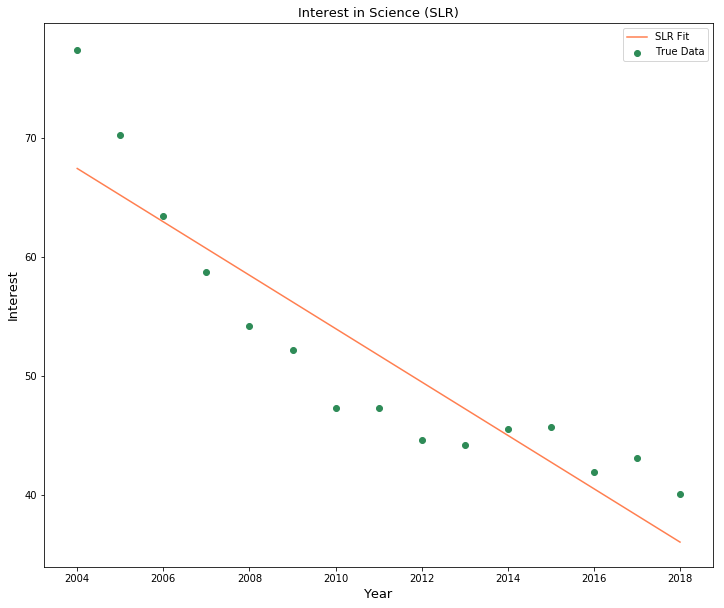

In [72]:
y = np.array(df_new['science'])
y = y[:-1]
x = np.array(range(2004,2019))

x_bar = x.mean()
y_bar = y.mean()

num = np.array((x-x_bar) * (y-y_bar)).sum()
denom = np.array((x-x_bar) * (x-x_bar)).sum()

beta = num/denom
alpha = y_bar - beta*x_bar
y_hat = alpha + beta*x
print('Alpha: {0:.3f}\nBeta: {1:.3f}'.format(alpha, beta))

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(x, y_hat, color='coral', label='SLR Fit');
ax.scatter(x, y, color='seagreen', label='True Data');
ax.set_title('Interest in Science (SLR)', fontsize=13);
ax.legend(loc='upper right');
ax.set_xlabel('Year', fontsize=13);
ax.set_ylabel('Interest', fontsize=13);

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in science is positive or negative. Fully justify your responses.

**Answer F**
<br>Our coefficient $\hat{\beta}$ is the calculated slope of our regression line. Based on it being about equal to -2, I would conclude that the relationship between time and interest in science is negative. This can also be clearly seen through the data points plotted above. Over time the overall interest in science has gone down and our regression line follows that trend as well.

**Part G**: What interest in science does your simple linear regression model predict in the year 2030? What about in 2050? What are potential drawbacks to this model for interest in science?

In [74]:
future = alpha + beta*2030
print('Interest in Science (2030): {0:.3f}'.format(future))
future = alpha + beta*2050
print('Interest in Science (2050): {0:.3f}'.format(future))

Interest in Science (2030): 9.232
Interest in Science (2050): -35.524


**Answer G**
<br>Some potential drawbacks for this model for the interest in science is that it is very possible that in the future the interest in science may start to go up and our simple linear regression model won't be able to accurately predict that because our data would not be linear and as our model name suggests it does a great job estimating linear data but fails when it comes to non-linear data.

**Part H:** Compute a 66% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result. Why is this a confidence interval for $\beta$ and not for $\hat{\beta}$?

In [92]:
num = np.array((x-x_bar) * (y-y_bar))
denom = np.array((x-x_bar) * (x-x_bar))

#use the divide function because there is a beta that is 0
beta = np.divide(num,denom, where=denom!=0)
beta[7] = 0
var = beta.var()
mean = beta.mean()
crit = stats.t.ppf(0.66, df=len(beta)-1)

ci = (mean - crit*(var/np.sqrt(len(beta)-1)), mean + crit*(var/np.sqrt(len(beta)-1)))

print('The 66% confidence interval for beta is: [{0:.3f}, {1:.3f}]'.format(ci[0], ci[1]))

The 66% confidence interval for beta is: [-2.412, -1.169]


**Answer H**
<br>This is not a confidence interval for $\hat{\beta}$ because $\hat{\beta}$ is a single value and we need to get each individual $\beta$ value for our CI. We want each individual $\beta$ from each calculation where $\hat{\beta}$ is the sum of all the $\beta$'s.

**Part I:** What proportion of the variation in mean annual interest in science is explained by your linear regression model?

In [94]:
#do a calculation for r^2

sse = ((y-y_hat)**2).sum()
sst = ((y-y_bar)**2).sum()
r_2 = 1-sse/sst
print('The proportion of the variation in mean annual interest in science is: {0:.3f}'.format(r_2))

The proportion of the variation in mean annual interest in science is: 0.819


**Answer I**
<br>Our value of $R^2=0.819$ tells us that our regression line models the data pretty well as it is much closer to a value of 1 than 0.5 or 0.

**Part J:** Make a scatter plot of the residuals from this simple linear regression model, relative to the annual mean interest data (and be sure to label your axes). Make a conjecture about what kind of additional feature, also based on `year`, should be added to improve the fit of the model. Note that this new model with have your new feature _and_ `year`, making it a _multiple linear regression_ model.

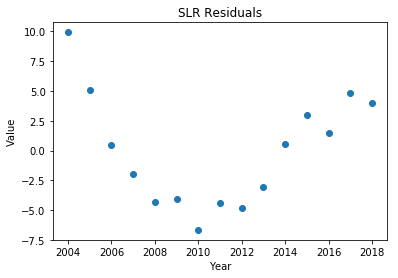

In [98]:
resid = y-y_hat
fig, ax = plt.subplots()
ax.scatter(x,resid);
ax.set_title('SLR Residuals');
ax.set_xlabel('Year');
ax.set_ylabel('Value');

**Answer J**
<br>I believe that adding the `month` as a feature to our model would help us get a better fit. This is because there is quite a bit of variation in interest month-to-month as well as year to year and it may help the model fit the data better if we included that in our model.

<br>

---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Choose-Your-Own Simple Linear Regression Adventure

The interest in science data from the previous problem was from [Google Trends](https://trends.google.com/trends/?geo=US). From that main page, you can enter a particular search term and view the interest in that term over time. By default, the data displayed will be weekly data for the past year. You can ask for different time periods or regions as well (my link above defaults to the United States).

**Part A:** Download data from Google Trends for a search term, region and time period of your choice. (Alternatively, you can also use data from whatever source you would like, as long as it is a time series.) Then:
* clearly state what your search term, region and time period are (or fully describe your other data set),
* load your data as a Pandas DataFrame, and
* make a plot of the data over the entire time frame. Be sure to label your axes clearly.

**NOTE:** be sure to **leave your plot cell executed** because you are not asked to host the data or provide the data set with the homework submission. If your plot is not readily visible when we open your notebook for grading, then you can earn a maximum of 10 points for this problem. 

**Answer A**
<br>My search term was "data science", the region was the United States and the time period is from 2004-present

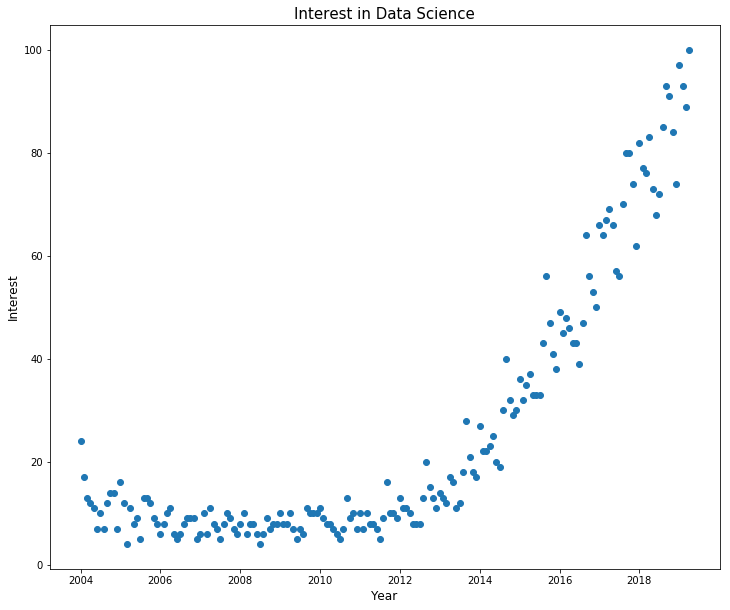

In [4]:
df = pd.read_csv('data.csv', header=2, names=['m-y', 'interest'])
df['year'], df['month'] = df['m-y'].str.split('-', 1).str
df.head()

ticks = [str(_) + '-01' for _ in range(2004,2020,2)]

fig, ax = plt.subplots(figsize=(12,10));
ax.plot_date(df['m-y'], df['interest'], xdate=True);
ax.set_xticks(ticks);
ax.set_xticklabels(range(2004,2020,2));
ax.set_title('Interest in Data Science', fontsize=15);
ax.set_xlabel('Year', fontsize=12);
ax.set_ylabel('Interest', fontsize=12);

**Part B:** Based on your figure from Part A, formulate a hypothesis regarding whether or not a statistically significant linear trend exists. Clearly state your null and alternative hypotheses, and the level of significance you will use for this hypothesis test. If you have reason to believe some kind of a trend that is *not linear* exists, say so.

**Answer B**
<br>Based on the figure in part `a` I do believe a linear trend exists. The hypothesis' we will be testing are the following for the $\alpha = 0.05$ significance level.
$$
H_0 : \beta = 0 \\
H_1 : \beta \ne 0
$$

**Part C:** Perform any processing that you need to do in order to satisfy the assumptions of the simple linear regression model. If you do not do any processing, then explain why you believe your data set already satisfies these assumptions (and clearly state the assumptions).

**Answer C**
<br>I will do a yearly analysis of the search term `data science`. To do this I will create a new dataframe with the year and the mean of interest in `data science` based on the Google Trends data.

In [5]:
df_new = df.groupby('year').mean()
df_new.head(20)

,interest
year,
2004,12.333333
2005,10.000000
2006,7.666667
2007,7.750000
2008,7.333333
2009,8.500000
2010,8.333333
2011,9.083333
2012,11.750000


**Part D:** Compute **by hand** the p-value associated with the hypothesis test from Part B. Clearly state your conclusion. You may use `scipy.stats.linregress` to check your answer, and you may use Python as a calculator (and to get critical values, for example), but you need to show all your work by hand.